In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "/content/drive/MyDrive/Potato-20220304T040717Z-001.zip" -d "/content"
!unrar x "/content/drive/MyDrive/Dataset/Potato/Potato.rar" "/content/Potato/"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/Potato/Potato.rar

Creating    /content/Potato                                           OK
Creating    /content/Potato/augmented_healthy                         OK
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_2487.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_3176.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_3983.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_8639.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_8740.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_8914.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_100_2093.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_100_6432

<h3>Preprocessing</h3>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
random.seed(4)

(256, 256, 3)


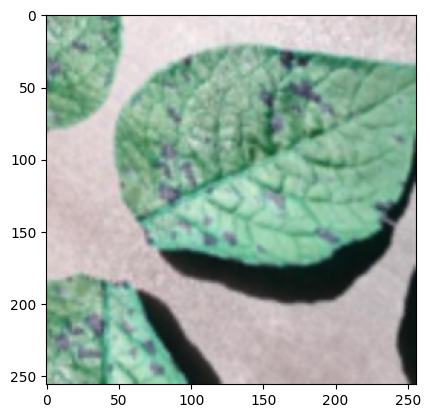

In [ ]:
data_path = '/content/Potato/'
# valid_path = '/content/drive/MyDrive/Potato/Validation'
categories = os.listdir(data_path)
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    print(np.array(new_array).shape)
    plt.imshow(new_array, cmap='gray')
    break
  break

In [ ]:
categories

['augmented_early_blight', 'augmented_late_blight', 'augmented_healthy']

<h3>Resizing - 224, Shuffling, Normalizing</h3>

In [ ]:
IMG_SIZE = 224

training_set = []

for category in categories:
  print()
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass


100%|██████████| 1561/1561 [00:02<00:00, 604.78it/s]


In [ ]:
random.shuffle(training_set)

In [ ]:
X = []
y = []

for img_array, label in training_set:
  X.append(img_array)
  y.append(label)

In [ ]:
np.array(X).shape

(4682, 224, 224, 3)

In [ ]:
X =  np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [ ]:
X = X/255.0

In [ ]:
X.shape

(4682, 224, 224, 3)

<h3>Pickling</h3>


In [ ]:
import pickle

pickle_out = open('Potato_X.pickle' , 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('Potato_y.pickle' , 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()



NOTE: Without ANN at the  end - 72 to 73 %